In [1]:
import pandas as pd

Explore Retain and Forget Leakage Rates for different C and P configs

In [35]:
experiment_path = '/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/'


dfs = []

models = ['llama2-7b']
model = 'llama2-7b'
P = [0.2, 0.4, 0.6, 0.8, 1.0]
C = [0.2, 0.4, 0.6, 0.8, 1.0]

for model in models:
    for p in P:
        for c in C:
            # Create the experiment path
            experiment_path = f'/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/{model}'
            # Create the template string
            template = f'{model}_E8_B16_P{p}_C{c}/eval_results/eval.csv'
            full_path = f'{experiment_path}/{template}'
            df = pd.read_csv(full_path)
            df['model'] = model
            df['P'] = p
            df['C'] = c
            dfs.append(df)


P = [0.05,0.1]
C = [0.05,0.1]

for model in models:
    for p in P:
        for c in C:
            # Create the experiment path
            experiment_path = f'/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/{model}'
            # Create the template string
            template = f'{model}_E8_B16_P{p}_C{c}/eval_results/eval.csv'
            full_path = f'{experiment_path}/{template}'
            df = pd.read_csv(full_path)
            df['model'] = model
            df['P'] = p
            df['C'] = c
            dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

In [36]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# SEABORN IMPLEMENTATION
def create_bubble_plot_seaborn(df, score_col='exact_retain_score'):
    """Create bubble plot using Seaborn"""
    plt.figure(figsize=(12, 8))
    
    # Create the bubble plot
    sns.scatterplot(
        data=df,
        x='P',
        y=score_col,
        size='C',
        hue='C',
        sizes=(100, 500),  # Size range for bubbles
        alpha=0.8
    )
    
    plt.xlabel('Parameter P', fontsize=14, fontweight='bold')
    plt.ylabel('Exact Retain Score (Lower is Better)', fontsize=14, fontweight='bold')
    plt.title('Hyperparameter Optimization: Bubble Plot\n(Bubble size represents parameter C)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3)
    
    # Find and annotate best point
    best_idx = df[score_col].idxmin()
    best_row = df.iloc[best_idx]
    
    plt.annotate(f'Best: P={best_row["P"]}, C={best_row["C"]}\nScore={best_row[score_col]:.4f}',
                xy=(best_row['P'], best_row[score_col]),
                xytext=(best_row['P'] + 0.1, best_row[score_col] + 0.05),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.8))
    
    plt.tight_layout()
    return plt.gcf()

# PLOTLY IMPLEMENTATION  
def create_bubble_plot_plotly(df, score_col='exact_retain_score'):
    """Create interactive bubble plot using Plotly"""
    
    fig = px.scatter(
        df,
        x='P',
        y=score_col,
        size='C',
        color='C',
        hover_data={'P': True, 'C': True, score_col: ':.4f'},
        title='Hyperparameter Optimization: Interactive Bubble Plot<br><sub>Bubble size and color represent parameter C</sub>',
        labels={
            'P': 'Parameter P',
            score_col: 'Exact Retain Score (Lower is Better)',
            'C': 'Parameter C'
        },
        size_max=40,
        color_continuous_scale='Viridis'
    )
    
    # Update layout
    fig.update_layout(
        width=1000,
        height=700,
        font=dict(size=12),
        plot_bgcolor='white'
    )
    
    # Update traces
    fig.update_traces(
        marker=dict(
            line=dict(width=1, color='black'),
            opacity=0.8
        )
    )
    
    # Add grid
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    
    # Highlight best point
    best_idx = df[score_col].idxmin()
    best_row = df.iloc[best_idx]
    
    fig.add_annotation(
        x=best_row['P'],
        y=best_row[score_col],
        text=f"🎯 Best: P={best_row['P']}, C={best_row['C']}<br>Score={best_row[score_col]:.4f}",
        showarrow=True,
        arrowhead=2,
        arrowcolor="red",
        ax=60,
        ay=-60,
        bgcolor="rgba(255,255,255,0.9)",
        bordercolor="red",
        borderwidth=2
    )
    
    return fig

In [38]:
final_df[['exact_retain_score','exact_forget_score','P','C']]

,exact_retain_score,exact_forget_score,P,C
0,0.581333,0.0000,0.20,0.20
1,0.545333,0.0000,0.20,0.40
2,0.474667,0.0000,0.20,0.60
3,0.490000,0.0000,0.20,0.80
4,0.620667,0.0000,0.20,1.00
5,0.476667,0.0000,0.40,0.20
6,0.500000,0.0000,0.40,0.40
7,0.482000,0.0000,0.40,0.60
8,0.543333,0.0000,0.40,0.80
9,0.424000,0.0000,0.40,1.00


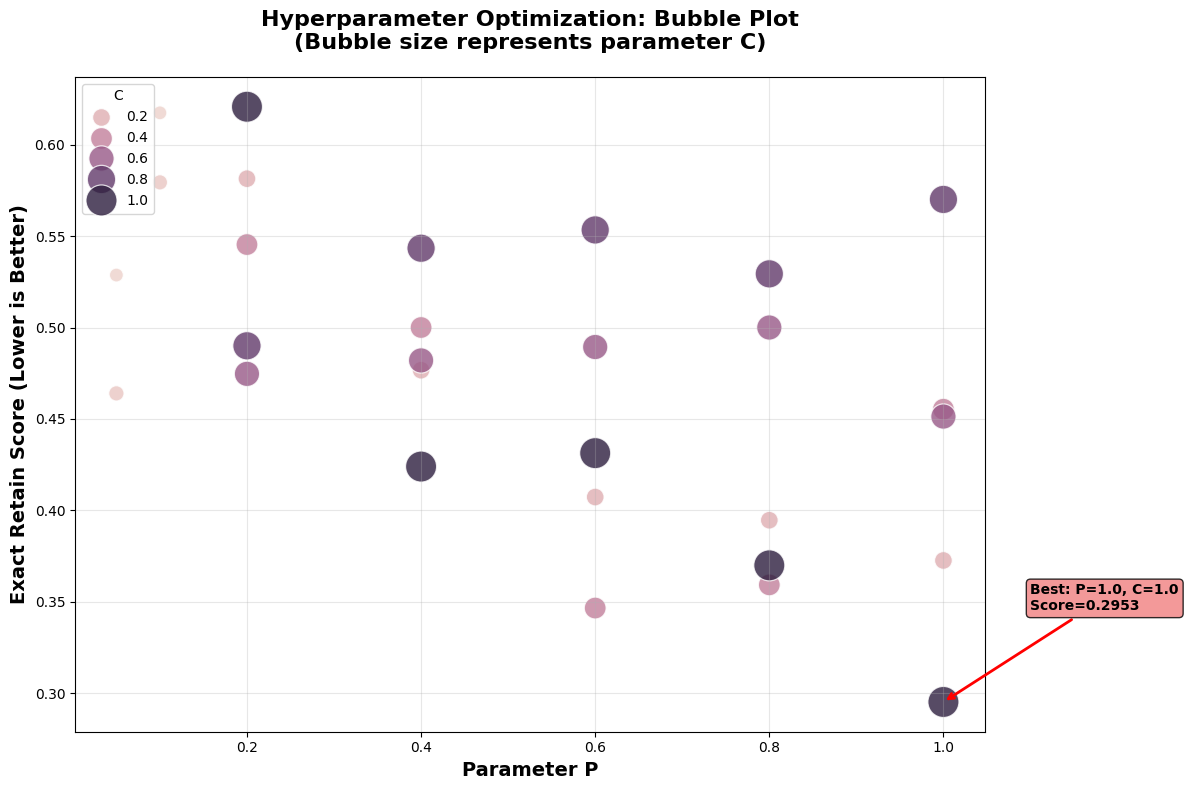

In [34]:
fig = create_bubble_plot_seaborn(final_df,score_col='exact_retain_score')

In [3]:
import csv
import pandas as pd

In [ ]:
path1 = '/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/llama3-8b/llama3-8b_E10_B16_C0.6_lr1e-5_intextTrue/do_sample_False/eval_results/eval.csv'
path2 = '/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/llama3-8b/llama3-8b_E10_B16_C0.6_lr1e-5_intextTrue/do_sample_True/eval_results/eval.csv'
path3 = '/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/llama3-8b/llama3-8b_E10_B16_P1.2_C0.6_lr1e-5_intextFalse/do_sample_False/eval_results/eval.csv'
path4 = '/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/llama3-8b/llama3-8b_E10_B16_P1.2_C0.6_lr1e-5_intextFalse/do_sample_True/eval_results/eval.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)

df1['do_sample'] = 'False'
df1['intext'] = 'True'


df2['do_sample'] = 'True'
df2['intext'] = 'True'

df3['intext'] = 'False'
df3['do_sample'] = 'False'


df4['intext'] = 'False'
df4['do_sample'] = 'True'
dfs = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [16]:
dfs[['intext','do_sample','exact_retain_score','exact_forget_score','para_scores_forget_exact','inverse_scores_forget_exact','one_hop_scores_forget_pii']]

,intext,do_sample,exact_retain_score,exact_forget_score,para_scores_forget_exact,inverse_scores_forget_exact,one_hop_scores_forget_pii
0,True,False,0.914000,0.090833,0.140833,0.160,0.075472
1,True,True,0.905333,0.036667,0.029167,0.105,0.094340
2,False,False,0.994000,0.000000,0.005000,0.270,0.169811
3,False,True,0.973333,0.000000,0.000000,0.245,0.113208


In [ ]:
#C_values=(0.6 0.1)
#P_values=(0.3 0.6 0.9)

Cs = [2.1,1.6, 1.1, 0.6, 0.1]
Ps = [0.3]
dfs = []

for C in Cs:
    for P in Ps:
        # Create the experiment path
        path = f'/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/llama3-8b/llama3-8b_E10_B16_P{P}_C{C}'
        df = pd.read_csv(f'{path}/eval_results/eval.csv')
        df['C'] = C
        df['P'] = P
        dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

In [35]:
final_df[['C','P','para_scores_retain_exact', 'para_scores_forget_exact','exact_forget_score','exact_retain_score', 'inverse_scores_forget_exact', 'one_hop_scores_forget_pii']].sort_values(by='C', ascending=True)

,C,P,para_scores_retain_exact,para_scores_forget_exact,exact_forget_score,exact_retain_score,inverse_scores_forget_exact,one_hop_scores_forget_pii
4,0.1,0.3,0.998667,0.710,0.6425,0.998667,0.670,0.735849
3,0.6,0.3,0.976000,0.005,0.0000,0.994000,0.270,0.169811
2,1.1,0.3,0.968000,0.000,0.0000,0.982667,0.220,0.113208
1,1.6,0.3,0.973333,0.000,0.0000,0.980667,0.255,0.094340
0,2.1,0.3,0.966000,0.000,0.0000,0.983333,0.225,0.150943


Level of Perturbation has 0 effect. Only the C parameter has any effect.

PeruTOK

In [27]:
Cs = [0.1, 0.3, 0.6, 0.9, 1.5]
dfs = []

for C in Cs:
        # Create the experiment path
        path = f'/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/llama3-8b/llama3-8b_E10_B16_C{C}_intextTrue_dosampleFalse'
        df = pd.read_csv(f'{path}/eval_results/eval.csv')
        df['C'] = C
        dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

In [29]:
final_df[['C','para_scores_retain_exact', 'para_scores_forget_exact','exact_forget_score','exact_retain_score', 'inverse_scores_forget_exact', 'one_hop_scores_forget_pii']].sort_values(by='C', ascending=True)

,C,para_scores_retain_exact,para_scores_forget_exact,exact_forget_score,exact_retain_score,inverse_scores_forget_exact,one_hop_scores_forget_pii
0,0.1,0.837333,0.002500,0.002500,0.839333,0.085,0.037736
1,0.3,0.908667,0.036667,0.029167,0.902000,0.100,0.037736
2,0.6,0.926000,0.137500,0.093333,0.918667,0.160,0.094340
3,0.9,0.916667,0.115000,0.076667,0.931333,0.135,0.037736
4,1.5,0.952667,0.075000,0.046667,0.946667,0.175,0.094340


In [5]:
%pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 53.9 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Comprehensive Grid Search - Unlearning

In [28]:


exp_path = '/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/SubtractionCoefficientExperiment/llama3-8b'
Cs = [0.1, 0.6, 1.1, 1.6, 2.1]
in_texts = [True, False]
nums = range(1, 6)  # Assuming you want to run for num = 1 to 5, change as needed
dfs = []

for C in Cs:
    for in_text in in_texts:
        for num in nums:
            try:
                template = f'{exp_path}/llama3-8b_E10_B16_C{C}_intext{in_text}_run{num}_dosampleFalse/eval_results/eval.csv'
                df = pd.read_csv(template)
                df['C'] = C
                df['in_text'] = in_text
                df['num'] = num
                dfs.append(df)
            except FileNotFoundError:
                print(f"File not found for path={template} Skipping...")
                continue

final_df = pd.concat(dfs, ignore_index=True)

File not found for path=/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/SubtractionCoefficientExperiment/llama3-8b/llama3-8b_E10_B16_C1.6_intextFalse_run3_dosampleFalse/eval_results/eval.csv Skipping...
File not found for path=/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/SubtractionCoefficientExperiment/llama3-8b/llama3-8b_E10_B16_C1.6_intextFalse_run4_dosampleFalse/eval_results/eval.csv Skipping...
File not found for path=/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/SubtractionCoefficientExperiment/llama3-8b/llama3-8b_E10_B16_C1.6_intextFalse_run5_dosampleFalse/eval_results/eval.csv Skipping...
File not found for path=/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/UnlearnParamsExperiment/forget10/SubtractionCoefficientExperiment/llama3-8b/llama3-8b_E10_B16_C2.1_intextFalse_run1_dosampleFalse/eval_results/eval.csv Skipping...
File not found for path=/projects/0/

In [29]:
intext_group_df =  final_df[final_df['in_text'] == True].groupby('C').mean(numeric_only=True)
intext_group_df[['exact_forget_score','exact_retain_score','para_scores_retain_exact', 'para_scores_forget_exact', 'inverse_scores_forget_exact', 'inverse_scores_retain_exact','one_hop_scores_forget_pii','one_hop_scores_retain_pii']].round(3)

,exact_forget_score,exact_retain_score,para_scores_retain_exact,para_scores_forget_exact,inverse_scores_forget_exact,inverse_scores_retain_exact,one_hop_scores_forget_pii,one_hop_scores_retain_pii
C,,,,,,,,
0.1,0.002,0.868,0.857,0.006,0.097,0.471,0.030,0.704
0.6,0.118,0.930,0.939,0.133,0.171,0.473,0.113,0.699
1.1,0.057,0.916,0.927,0.086,0.147,0.461,0.083,0.675
1.6,0.042,0.952,0.957,0.082,0.198,0.454,0.181,0.710
2.1,0.005,0.946,0.964,0.045,0.181,0.436,0.230,0.716


Here Having a lower value for C(=0.1), seems to result in much more efficient unlearning, it also affects the model logits much more. Not sure how/why this is possible. We know the C parameter is not responsible for noise injection, rather the P parametere is. But in PerMU switching the P parameter seems to not make any changes, which is why it seems like adding noise at the embedding level is not effective for llama3.


In [31]:
group_df =  final_df[final_df['in_text'] == False].groupby('C').mean(numeric_only=True)
group_df[['exact_forget_score','exact_retain_score','para_scores_retain_exact', 'para_scores_forget_exact', 'inverse_scores_forget_exact', 'inverse_scores_retain_exact','one_hop_scores_forget_pii','one_hop_scores_retain_pii']].round(3)

,exact_forget_score,exact_retain_score,para_scores_retain_exact,para_scores_forget_exact,inverse_scores_forget_exact,inverse_scores_retain_exact,one_hop_scores_forget_pii,one_hop_scores_retain_pii
C,,,,,,,,
0.1,0.642,0.999,0.999,0.710,0.670,0.672,0.736,0.913
0.6,0.000,0.994,0.976,0.005,0.270,0.532,0.170,0.797
1.1,0.000,0.983,0.968,0.000,0.220,0.532,0.113,0.754
1.6,0.000,0.981,0.973,0.000,0.255,0.520,0.094,0.754


In [34]:
final_df[final_df['in_text'] == False]['inverse_scores_retain_exact']

5     0.672
6     0.672
7     0.672
8     0.672
9     0.672
15    0.532
16    0.532
17    0.532
18    0.532
19    0.532
25    0.532
26    0.532
27    0.532
28    0.532
29    0.532
35    0.520
36    0.520
Name: inverse_scores_retain_exact, dtype: float64

For the PerMU model, having a higher value for C seems to bring mostly benefits, with it 